In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# metrics = pd.read_csv('models/metrics.csv')
# winrates = pd.read_csv('models/winrates.csv')
rewards_rl = pd.read_csv('rewards_rl.csv', names=['reward'])#.iloc[:338]
rewards_fix = pd.read_csv('rewards_opp.csv', names=['reward'])#.iloc[:385]
# metrics.shape, winrates.shape

In [11]:
rewards_rl.shape, rewards_fix.shape

((247, 1), (246, 1))

In [12]:
rewards_rl_no_dubs = rewards_rl.drop_duplicates()
rewards_fix_no_dubs = rewards_fix.drop_duplicates()

In [13]:
rewards_rl_no_dubs.shape, rewards_fix_no_dubs.shape

((38, 1), (39, 1))

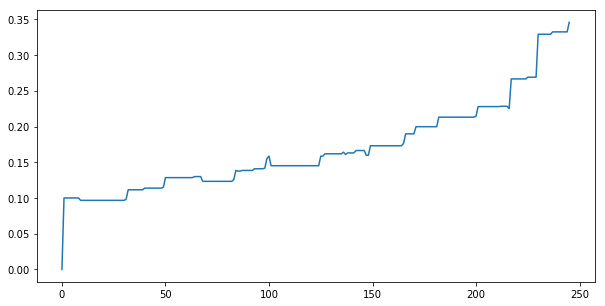

In [14]:
plt.figure(figsize=(10,5))
plt.plot(rewards_fix.index, rewards_fix.reward)
plt.show()

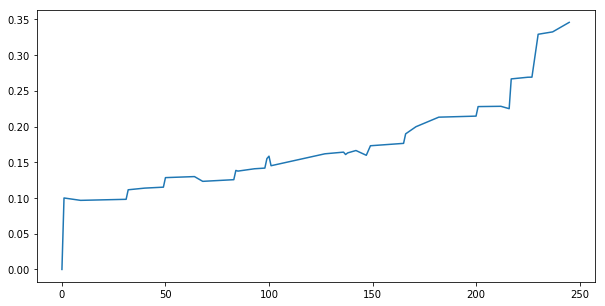

In [15]:
plt.figure(figsize=(10,5))
plt.plot(rewards_fix_no_dubs.index, rewards_fix_no_dubs.reward)
plt.show()

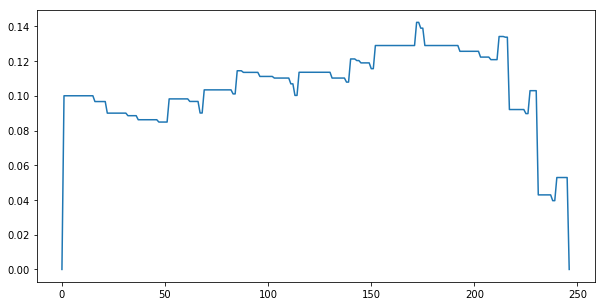

In [16]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl.index, rewards_rl.reward)
plt.show()

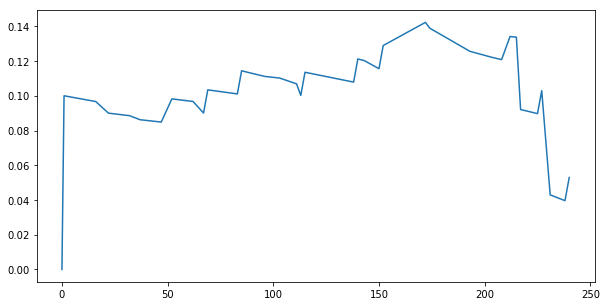

In [17]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl_no_dubs.index, rewards_rl_no_dubs.reward)
plt.show()

In [10]:
shifted_sigmoid = lambda x: 1 / (1 + np.exp(-(x))) 
rational_sigmoid = lambda x, c: (x - 1500) / (c + np.abs(x - 1500))

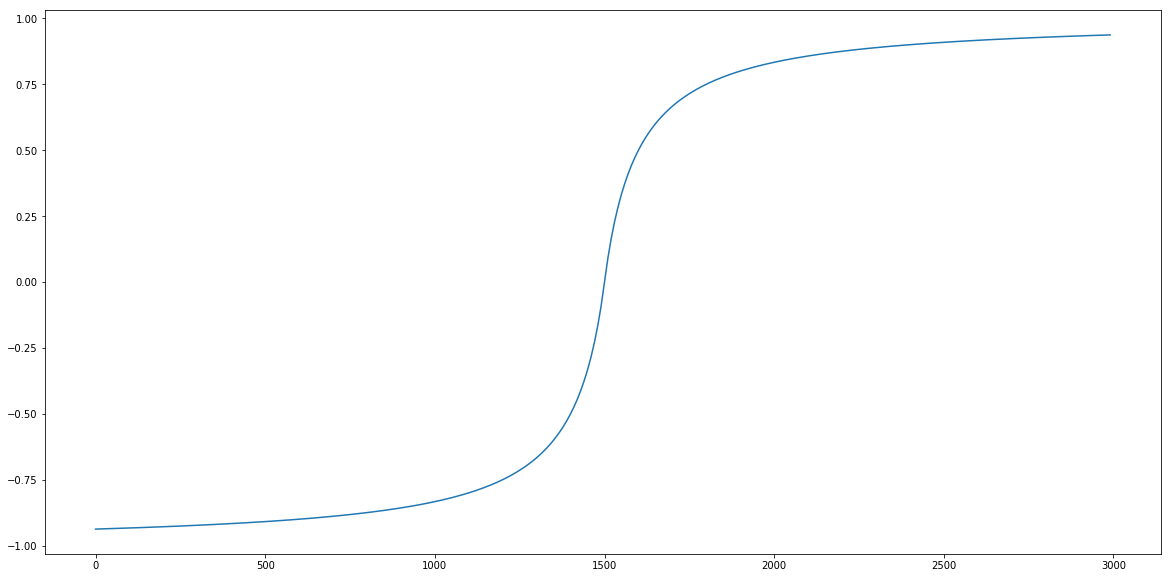

In [16]:
x = np.array(list(range(0, 3000, 10)))
plt.figure(figsize=(20,10))
plt.plot(x, rational_sigmoid(x, 100))
plt.show()

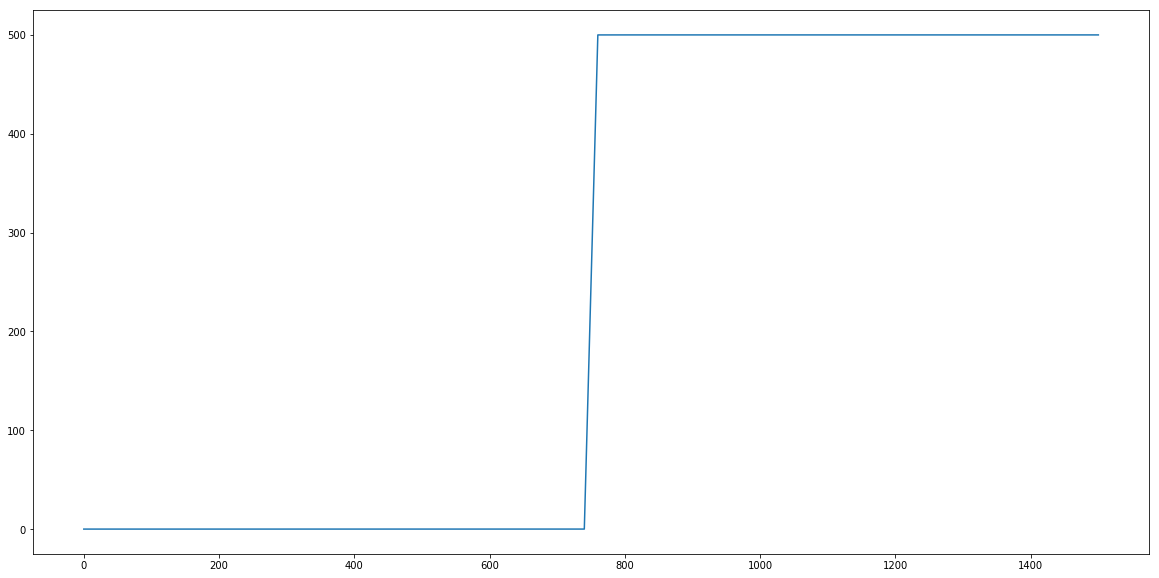

In [45]:
money = list(range(0, 1501, 10))
y = [shifted_sigmoid(x) for x in money]
plt.figure(figsize=(20,10))
plt.plot(money, y)
plt.show()

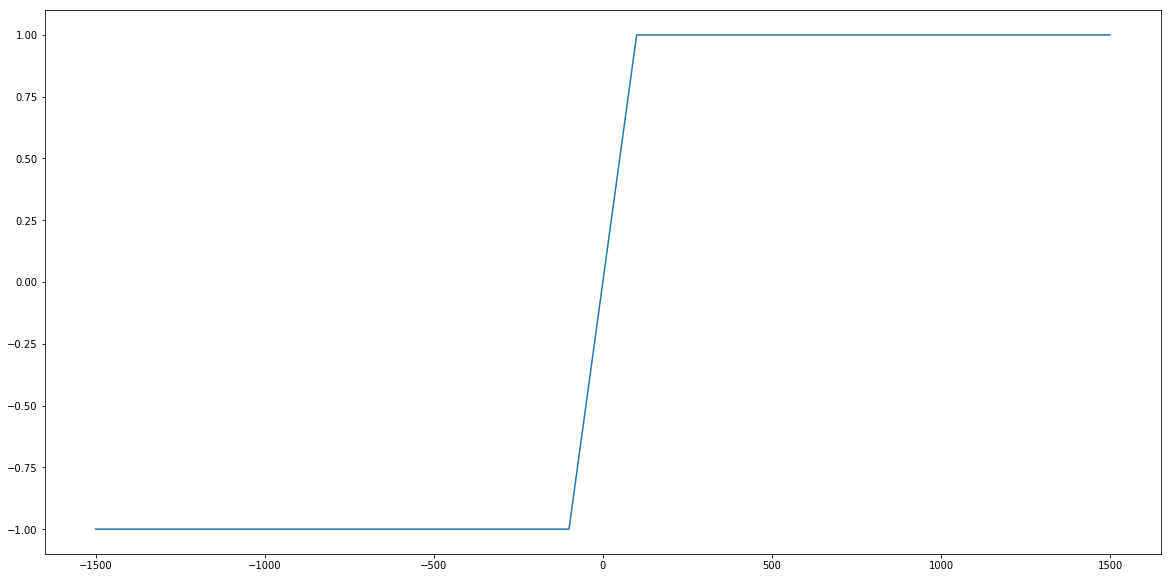

In [6]:
money = list(range(-1500, 1501, 100))
y = [np.tanh(x) for x in money]
plt.figure(figsize=(20,10))
plt.plot(money, y)
plt.show()

In [102]:
shifted_sigmoid(1400)

3.7200759760208356e-44

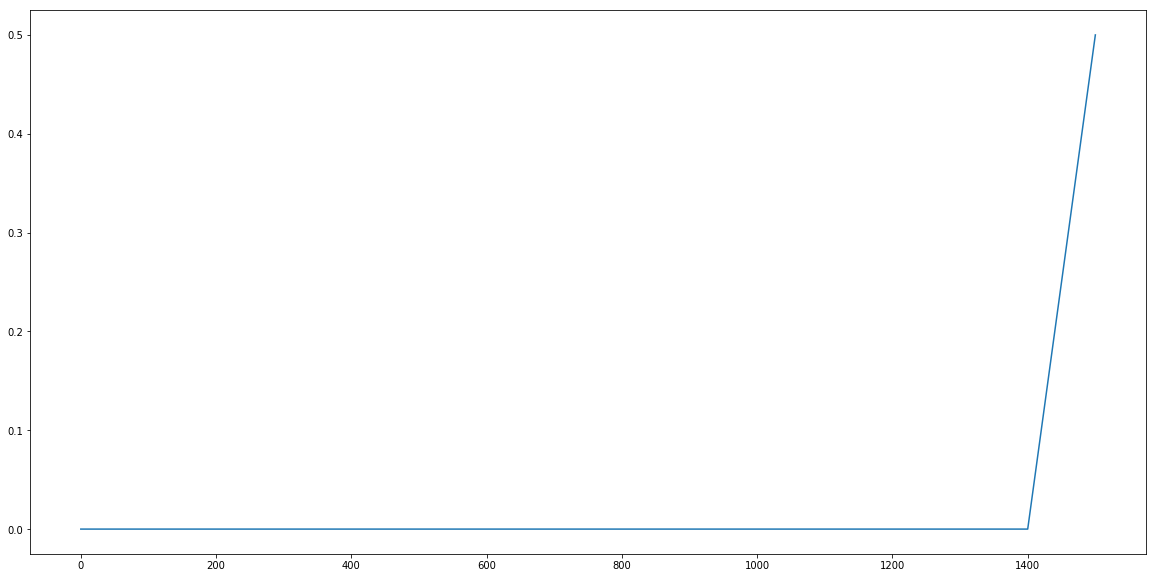

In [68]:
metrics.head()

,episode,n_agents,value_loss_avg,value_loss_median,action_loss_avg,action_loss_median
0,0,2,8.928603,8.928603,0.280686,0.280686
1,1,2,3.120707,3.120707,0.327238,0.327238
2,2,2,2.689691,2.689691,0.169440,0.169440
3,3,2,3.116615,3.116615,0.161011,0.161011
4,4,2,6.151509,6.151509,0.195243,0.195243


In [69]:
winrates.head()

,episode,vs_random,vs_fixed
0,0,16.0,0.0
1,2,90.0,6.0
2,4,100.0,26.0


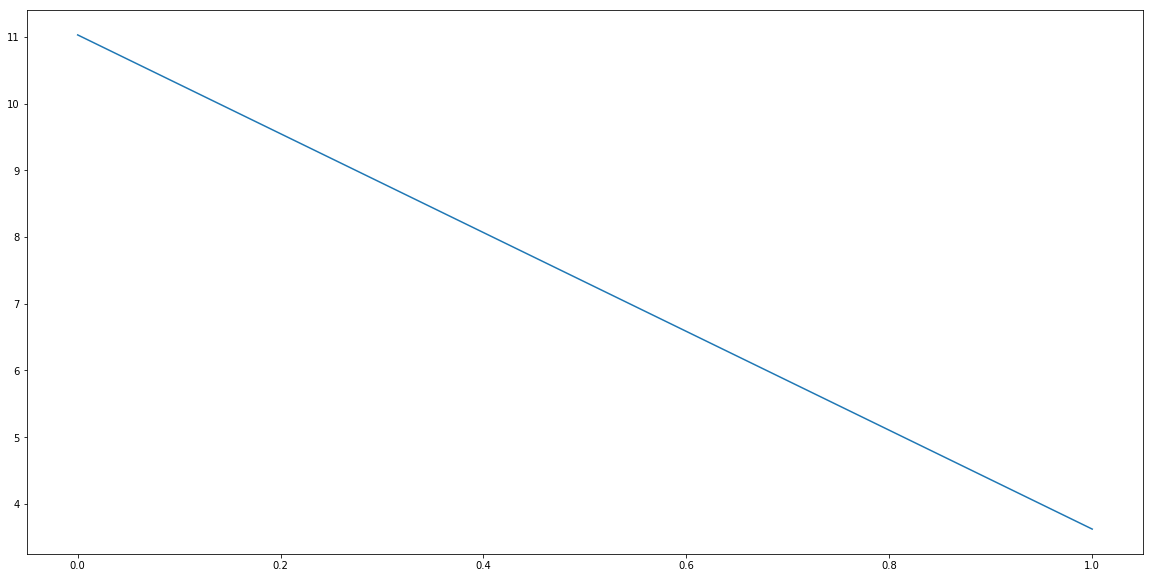

In [57]:
plt.figure(figsize=(20,10))
plt.plot(metrics.episode, metrics.value_loss_avg)
plt.show()

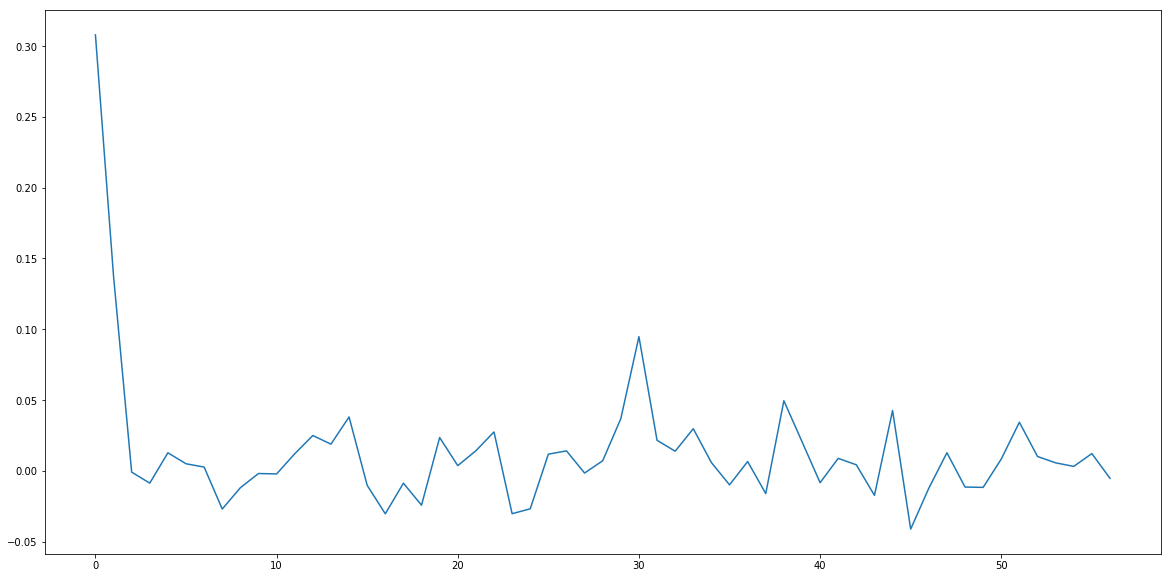

In [52]:
plt.figure(figsize=(20,10))
plt.plot(metrics.episode, metrics.action_loss_avg)
plt.show()

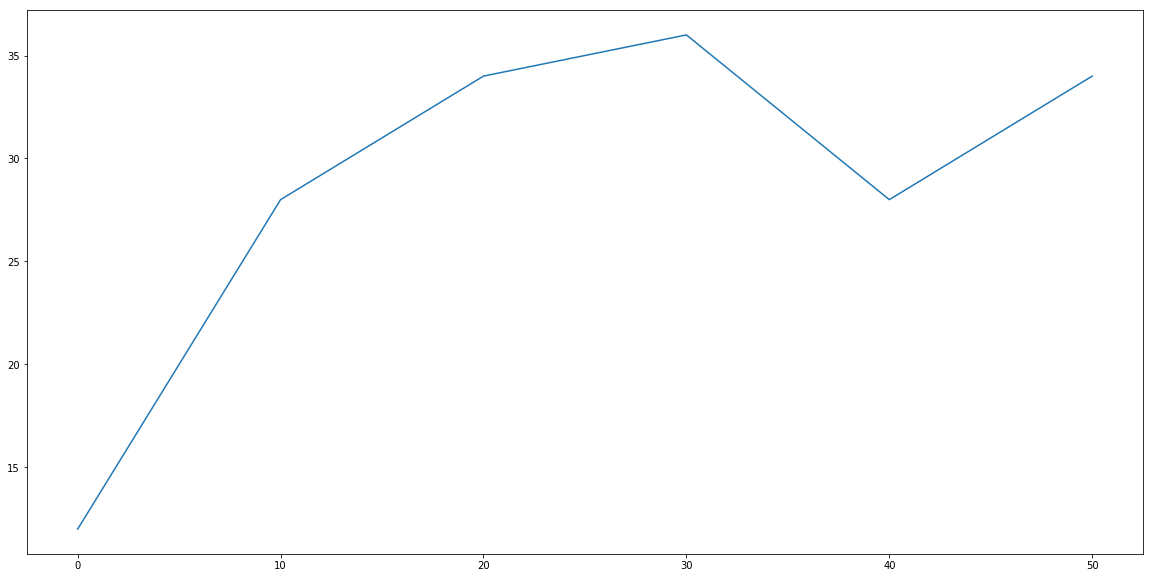

In [53]:
plt.figure(figsize=(20,10))
plt.plot(winrates.episode, winrates.vs_fixed)
plt.show()

In [29]:
# winrates.sort_values(by='winrate', ascending=False).head()

In [35]:
plt.figure(figsize=(20,10))
plt.plot(winrates.index, winrates.winrate)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'winrate'

<Figure size 1440x720 with 0 Axes>

In [14]:
import torch
import torch.nn.functional as F

In [22]:
import datetime
start = datetime.datetime.now()
i = 1
for _ in range(10000000):
    i += 2 - 1
end = datetime.datetime.now()
diff = end - start
print(start, end)
print('Training took {} min'.format(np.round(diff.total_seconds() / 60, 3)))
print('Training took {} sec'.format(np.round(diff.total_seconds(), 3)))

2019-04-18 14:08:07.274795 2019-04-18 14:08:09.121109
Training took 0.031 min
Training took 1.846 sec


In [15]:
x = torch.tensor([[ 242.0008,  -71.6844,  -78.2950,  -68.1347,  -90.1014,  -32.5429,
          -61.6245,  -62.3093, -130.0613,  -54.1011,  -81.4538,  -49.4479,
          -79.0107, -133.0492, -145.3621,  -48.6682,  -45.7698, -173.4780,
         -106.4019, -111.9009,  -97.4872, -181.5754, -151.2389, -124.2530,
          -96.2654, -130.3432,  -57.9841, -129.8216,  -53.8984,  -19.5782,
          -72.0135,  -94.7807,  -73.1792,   19.5135,  -67.2402,  -53.3469,
         -140.9274, -114.4214,  -91.1164, -119.3983,  -92.5455, -102.5497,
         -116.6932,  -88.0974, -162.1370, -176.0957, -145.4094, -128.5667,
         -119.6410, -157.4197, -178.4944,  -78.6380,  -72.7537, -104.2055,
          -41.6357, -133.8063,  -71.6692,  -88.6386, -122.6101, -122.4700]])

In [16]:
F.softmax(x, dim=1)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]])